Imports:

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import lda
import lda.datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import sklearn.metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# Part 1

In [ ]:
inst_1 = pd.read_csv('instagram_1.csv')

In [59]:
inst_1.head()

,hashtags,separated
0,vibetribe openair spintwist fullon fiesta edm...,"[vibetribe, openair, spintwist, fullon, fiesta..."
1,love beauty spring iphonesia igdaily igers in...,"[love, beauty, spring, iphonesia, igdaily, ige..."
2,beautiful pencil sketch korea art seoul amate...,"[beautiful, pencil, sketch, korea, art, seoul,..."
3,europe omd tagsforlikers olympus switzerland ...,"[europe, omd, tagsforlikers, olympus, switzerl..."
4,eyes fashion victims blackandwhite ciao selfi...,"[eyes, fashion, victims, blackandwhite, ciao, ..."


Obtaining the document-term matrix for LDA

In [ ]:
inst_1['separated'] = inst_1.hashtags.str.strip().str.split(' ')
#doc.lines.str.strip().str.split('[\W_]+')

In [ ]:
words = list(set(inst_1.separated.sum()))

In [ ]:
# Document-term matrix variable
inst_doc_term = np.zeros([len(inst_1), len(words)])

In [60]:
inst_doc_term.shape

(5000, 29913)

In [61]:
inst_1.separated.tolist()[0][:5]

['vibetribe', 'openair', 'spintwist', 'fullon', 'fiesta']

In [ ]:
# If a hashtag ('w') is found in a tweet,
# the correcponding cell is set to 1
# (since the hashtag lists don't have repetitions,
#  there's no need to count occurences)
for j, w in enumerate(words):
    for i, row in enumerate(inst_1.separated.tolist()):
        if w in row:
            inst_doc_term[i][j] = 1

#### LDA

K = 15

In [ ]:
X = inst_doc_term.astype('int64')
vocab = words
titles = np.array(inst_1.index)

model = lda.LDA(n_topics=15, n_iter=1500, random_state=1)
model.fit(X)
topic_word = model.topic_word_
n_top_words = 10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i+1, ' '.join(topic_words)))

Topic 1: photooftheday beautiful architecture instagood switzerland travel tagsforlikes love holiday night
Topic 2: instagood love photooftheday followme picoftheday follow amazing instadaily instalike beautiful
Topic 3: love friends happy music party switzerland fun me swiss life
Topic 4: picoftheday instagood instamood photooftheday instadaily igers instagramhub bestoftheday iphonesia igdaily
Topic 5: visitswitzerland ig_switzerland switzerland wu_switzerland ig_europe myswitzerland super_switzerland inlovewithswitzerland ig_swiss vscocam
Topic 6: travel switzerland europe swiss nature instatravel mountains wanderlust travelgram trip
Topic 7: fashion swiss switzerland 스위스 style ootd instafashion zürich beauty makeup
Topic 8: ig_eurasia allunique_pro ig_murcia ig_ikeda lebanon_hdr vivir_to2 ig_lebanon ig_su ig_serenity love_hdr_colour
Topic 9: art switzerland سويسرا تصويري انترلاكن dubai travel artist سفر interlaken
Topic 10: switzerland suisse schweiz igerssuisse swiss geneva svizzera ig_switzerland igersswitzerland blackandwhite
Topic 11: snow switzerland winter mountains alps ski swiss schweiz suisse mountain
Topic 12: fitness fit gym car sport workout lifestyle training motivation healthy
Topic 13: switzerland nature lake sky beautiful landscape swiss clouds sun schweiz
Topic 14: food foodporn instafood yummy delicious sweet switzerland instagood foodie dinner
Topic 15: zurich switzerland luxury zürich züri gay swiss lifestyle watch instagay

K = 20

In [ ]:
model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)

model.fit(X)
topic_word = model.topic_word_
n_top_words = 10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i+1, ' '.join(topic_words)))

Topic 1: سويسرا switzerland architecture تصويري انترلاكن design interlaken سفر dubai سياحة
Topic 2: travel switzerland instatravel travelgram europe trip wanderlust instagood photooftheday vacation
Topic 3: fashion style zurich beauty ootd switzerland model zürich instafashion love
Topic 4: switzerland schweiz suisse zurich swiss zürich igerssuisse architecture svizzera blackandwhite
Topic 5: switzerland snow mountains winter alps swiss nature mountain swissalps ski
Topic 6: switzerland швейцария swiss schweiz suisse bern beer tattoo горы football
Topic 7: love happy switzerland swiss friends life fun me family beautiful
Topic 8: instagood picoftheday instamood photooftheday instadaily igers instagramhub bestoftheday iphonesia igdaily
Topic 9: visitswitzerland ig_switzerland wu_switzerland ig_europe super_switzerland myswitzerland switzerland switzerland_vacations ig_swiss inlovewithswitzerland
Topic 10: instagood love photooftheday followme follow picoftheday amazing instalike like4like me
Topic 11: switzerland christmas luxury design love hotel art home xmas winter
Topic 12: nature sky switzerland beautiful sun clouds lake sunset view landscape
Topic 13: fitness fit gym sport workout healthy training motivation fitfam lifestyle
Topic 14: party music friends love night switzerland zurich fun happy girls
Topic 15: gopro italia la liebe farm monday fotoshooting event ig_italy thun
Topic 16: geneva car switzerland cars luxury geneve carporn supercar lamborghini carswithoutlimits
Topic 17: food foodporn instafood yummy delicious dinner foodie lunch sweet eat
Topic 18: switzerland swiss schweiz svizzera ticino suisse lake lugano nature landscape
Topic 19: vsco vscocam switzerland art photographer zurich germany vscogood canon istanbul
Topic 20: switzerland suisse art swiss igerssuisse lausanne geneva montreux lacleman schweiz

K = 25

In [ ]:
model = lda.LDA(n_topics=25, n_iter=1500, random_state=1)

model.fit(X)  # model.fit_transform(X) is also available
topic_word = model.topic_word_  # model.components_ also works
n_top_words = 10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i+1, ' '.join(topic_words)))

Topic 1: travel instatravel switzerland travelgram trip europe traveling wanderlust vacation travelling
Topic 2: food foodporn سويسرا instafood yummy delicious foodie تصويري switzerland restaurant
Topic 3: switzerland schweiz zürich zurich svizzera suisse ticino swiss lugano lake
Topic 4: switzerland gopro beer 20likes tattoo 10likes luzern 30likes lucerne drone
Topic 5: switzerland suisse schweiz swiss igerssuisse myswitzerland valais svizzera igersswitzerland switzerlandwonderland
Topic 6: instagood switzerland picoftheday nature photooftheday amazing beautiful love sky instagram
Topic 7: dog animal animals cute dogsofinstagram photooftheday instadog love pet instagood
Topic 8: snow winter switzerland mountains ski alps swiss skiing mountain sun
Topic 9: architecture design switzerland art city zurich street building urban style
Topic 10: instagood picoftheday instamood photooftheday igers instadaily iphonesia instagramhub bestoftheday igdaily
Topic 11: igerssuisse blackandwhite switzerland bw gf_swiss ig_switzerland igerszurich bnw schweiz wu_switzerland
Topic 12: швейцария nature flower spring flowers switzerland swiss goodmorning red autumn
Topic 13: visitswitzerland wu_switzerland ig_switzerland ig_europe super_switzerland ig_swiss switzerland_vacations inlovewithswitzerland loves_switzerland myswitzerland
Topic 14: allunique_pro ig_eurasia ig_murcia lebanon_hdr vivir_to2 ig_ikeda ig_lebanon ig_su love_hdr_colour ig_serenity
Topic 15: vsco vscocam zurich zürich zuerich vscogood züri running zrh basel
Topic 16: sky sun nature clouds sunset beautiful blue photooftheday lake cloudporn
Topic 17: music luxury party switzerland watch concert zurich love hiphop live
Topic 18: switzerland swiss 스위스 interlaken travel grindelwald 여행 bern 유럽 여행스타그램
Topic 19: love happy friends fun switzerland zurich me family smile life
Topic 20: nature switzerland mountains landscape alps hiking mountain lake swiss schweiz
Topic 21: car geneva switzerland luxury cars carporn supercar amazingcars247 lamborghini carswithoutlimits
Topic 22: fashion fitness style fit gym lifestyle ootd motivation workout healthy
Topic 23: instagood photooftheday followme follow love picoftheday like4like tagsforlikes me bestoftheday
Topic 24: switzerland geneva suisse swiss montreux geneve lacleman lake lac lakegeneva
Topic 25: art artist switzerland sport bike creative cycling drawing instagood schweiz

### Found topics

......

# Part 2

In [153]:
inst_2_file = open('instagram_2.json', 'r', encoding='utf8')

In [154]:
labels_all = []
tags_all = []
imgfeatures_all = []

for l in inst_2_file:
    d = json.loads(l)
    labels_all.append(d['label'])
    tags_all.append(d['tags'])
    imgfeatures_all.append(d['imgfeatures'])

### Questions 1, 3

In [155]:
tags_all = pd.DataFrame(tags_all)
inst_2 = pd.DataFrame(list(zip(labels_all, tags_all, \
        imgfeatures_all)), columns=['label','tags', 'imgfeatures'])

In [156]:
inst_2_imgfeatures = pd.DataFrame(imgfeatures_all)
inst_2_tags_all = pd.DataFrame(tags_all)

In [157]:
labels_all = np.array(labels_all)

In [158]:
scoring = ['accuracy', 'precision_macro', 'recall_macro']

#### Classification using tags

In [159]:
tags_all = np.array(inst_2_tags_all)

In [160]:
X = tags_all
y = labels_all
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X, y)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [114]:
clf_predictions = clf.predict(X)

In [115]:
accuracy_score(y, clf_predictions)

0.6783333333333333

In [116]:
precision_score(y, clf_predictions, average='macro')

0.8299259781459287

In [117]:
recall_score(y, clf_predictions, average='macro')

0.5722517730496454

##### 10-fold Cross-validation

In [137]:
scores = cross_validate(clf, X, y, scoring=scoring, cv=10, return_train_score=True)

In [138]:
scores['train_accuracy'].mean()

0.6775925886043789

In [139]:
scores['train_precision_macro'].mean()

0.8296679471776522

In [140]:
scores['train_recall_macro'].mean()

0.5712667759202514

In [141]:
scores['test_accuracy'].mean()

0.6776663592558436

In [142]:
scores['test_precision_macro'].mean()

0.8297135249271728

In [143]:
scores['test_recall_macro'].mean()

0.5713693109987359

| *Accuracy* | *Precision* | *Recall*  |
|:--------:|:---------:|:-------:|
| 0.67767  | 0.82971   | 0.57137 |

#### Classification using image features

In [161]:
imgfeatures_all = np.array(inst_2_imgfeatures)

In [162]:
X = imgfeatures_all
y = labels_all
clf_IF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf_IF.fit(X, y)  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [163]:
print(clf_IF.score(X, y))

0.687


In [164]:
clf_IF_predictions = clf_IF.predict(X)

In [165]:
accuracy_score(y, clf_IF_predictions)

0.687

In [166]:
precision_score(y, clf_IF_predictions, average='macro')

0.8304188668062082

In [167]:
recall_score(y, clf_IF_predictions, average='macro')

0.5839527641389344

##### 10-fold Cross-validation

In [168]:
scores = cross_validate(clf, X, y, scoring=scoring, cv=10, return_train_score=True)

In [172]:
scores['test_accuracy'].mean()

0.6769941332681475

In [173]:
scores['test_precision_macro'].mean()

0.8267956044460428

In [174]:
scores['test_recall_macro'].mean()

0.570647601357518

| *Accuracy* | *Precision* | *Recall*  |
|:--------:|:---------:|:-------:|
| 0.67699  | 0.82679   | 0.57064 |

### Question 2

#### Most prominent Hashtags

In [97]:
inst_2_tags = pd.DataFrame()
inst_2_tags = inst_2_tags_all
inst_2_tags['labels'] = labels_all

In [98]:
# Separating alcohol/non-alcohol objects
inst_2_alco = (inst_2_tags[inst_2_tags['labels'] == 'alcohol'])
inst_2_non = (inst_2_tags[inst_2_tags['labels'] == 'nonalcohol'])

Alcohol

In [99]:
alco_top_30_tags = (pd.DataFrame(inst_2_alco.sum(), columns=['posts'])[:-1]).sort_values(by=['posts'], ascending=False)[:30]
alco_top_30_tags

,posts
switzerland,481
beer,336
wine,326
zurich,251
friends,247
champagne,150
swiss,147
love,145
party,130
geneva,121


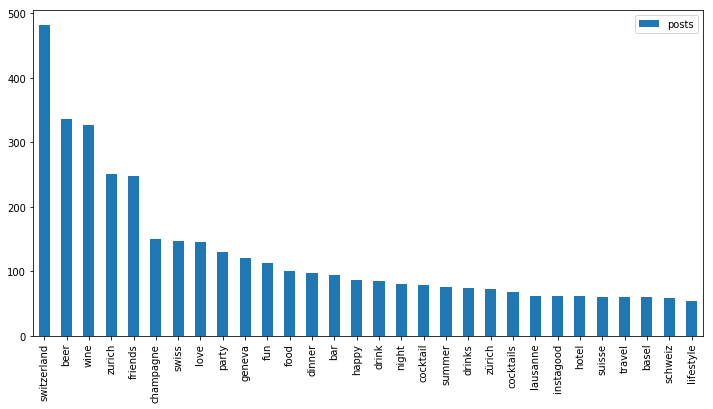

In [100]:
alco_top_30_tags.plot(kind='bar', figsize=(12,6))

Non-Alcohol

In [101]:
nonalco_top_30_tags = (pd.DataFrame(inst_2_non.sum(), columns=['posts'])[:-1]).sort_values(by=['posts'], ascending=False)[:30]
nonalco_top_30_tags

,posts
cafe,325
coffee,308
switzerland,288
zurich,189
restaurant,176
winter,159
dubai,142
shisha,140
kuwait,139
mydubai,139


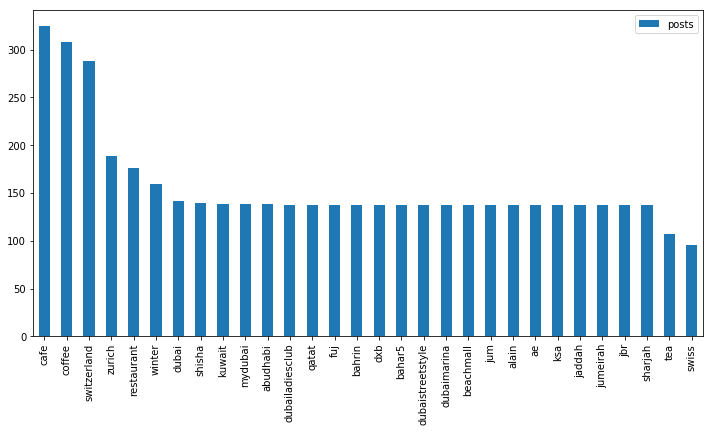

In [102]:
nonalco_top_30_tags.plot(kind='bar', figsize=(12,6))

#### Most prominent Image features

In [103]:
inst_2_if = pd.DataFrame()
inst_2_if = inst_2_imgfeatures
inst_2_if['labels'] = labels_all

In [104]:
inst_2_alco_if = (inst_2_if[inst_2_if['labels'] == 'alcohol'])
inst_2_non_if = (inst_2_if[inst_2_if['labels'] == 'nonalcohol'])

Alcohol

In [105]:
alco_top_30_if = (pd.DataFrame(inst_2_alco_if.sum(), columns=['posts'])[:-1]).sort_values(by=['posts'], ascending=False)[:30]
alco_top_30_if

,posts
beer glass,131.609
red wine,81.062
"restaurant, eating house, eating place, eatery",58.8177
plate,55.6238
wine bottle,55.28
beer bottle,49.4496
goblet,42.5356
"candle, taper, wax light",37.8404
eggnog,29.4596
stage,18.9761


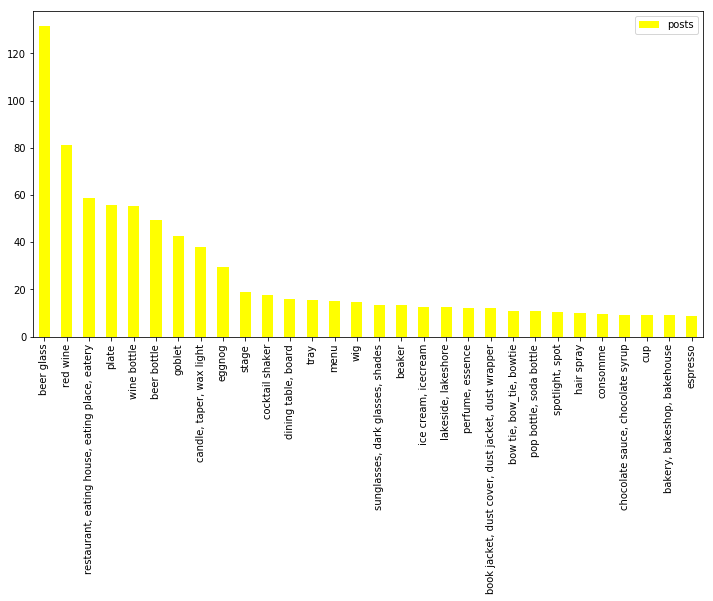

In [106]:
alco_top_30_if.plot(kind='bar', figsize=(12,6), color='yellow')

Non-Alcohol

In [107]:
nonalco_top_30_if = (pd.DataFrame(inst_2_non_if.sum(), columns=['posts'])[:-1]).sort_values(by=['posts'], ascending=False)[:30]
nonalco_top_30_if

,posts
espresso,83.3057
"restaurant, eating house, eating place, eatery",33.5206
cup,33.1346
plate,23.2398
"pop bottle, soda bottle",23.1792
eggnog,23.1604
"ice cream, icecream",21.6336
coffee mug,21.1432
"sunglasses, dark glasses, shades",17.0618
"bakery, bakeshop, bakehouse",15.5581


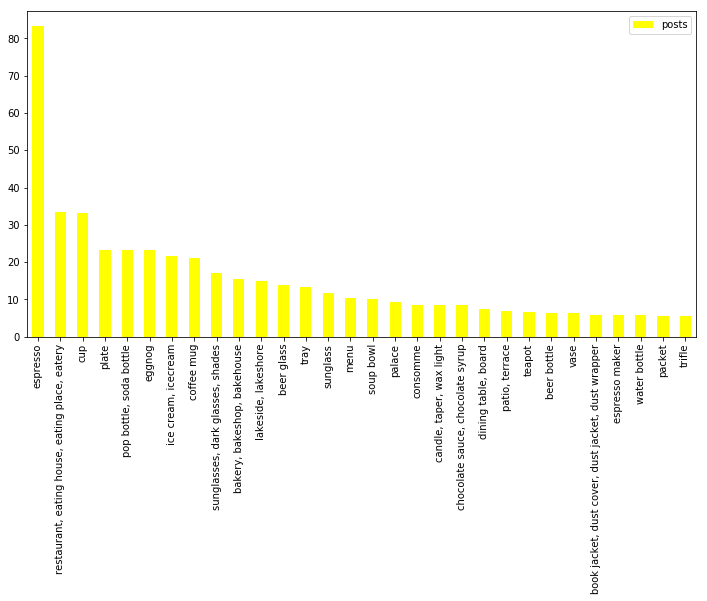

In [108]:
nonalco_top_30_if.plot(kind='bar', figsize=(12,6), color='yellow')

#### Part 2 - discussion